# Exercise - Analyzing Data Science Job Demand

### Topics Covered

This exercise goes over:
- Data cleaning and preparation
- Data management
- Extract from datetime
- Pivot tables
- Index managements

### Question
In our project we want to see how in-demand skills are trending for data jobs. But before we do that let's look at:
- General trend of data jobs in demand. We're going to look at it by month

### Loading data

In [2]:
# Importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import calendar

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [3]:
df.sample(10, random_state=42)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
502901,Senior Data Engineer,Senior Data Engineer,"St Paul, MN",via BeBee,Full-time,False,"Florida, United States",2023-12-17 11:09:06,False,False,United States,None,NaN,NaN,ManpowerGroup,"['sql', 'azure', 'git']","{'cloud': ['azure'], 'other': ['git'], 'progra..."
406337,Senior Data Scientist,Senior Analytics Engineer,"London, UK",via LinkedIn,Full-time,False,United Kingdom,2023-10-06 16:09:56,False,False,United Kingdom,None,NaN,NaN,Harnham,"['sql', 'python', 'bigquery', 'snowflake', 'lo...","{'analyst_tools': ['looker'], 'cloud': ['bigqu..."
659951,Data Engineer,Data Engineer,"Newcastle upon Tyne, UK",via Indeed,Full-time,False,United Kingdom,2023-09-06 10:11:25,True,False,United Kingdom,None,NaN,NaN,Morgan King,None,None
541593,Data Analyst,Data Analyst,Malta,via Trabajo.org,Full-time,False,Malta,2023-02-14 21:14:18,True,False,Malta,None,NaN,NaN,Konnekt,['jira'],{'async': ['jira']}
425158,Senior Data Engineer,Senior Data Engineer. Job in Amsterdam NBC4i Jobs,"Amsterdam, Netherlands",via NBC4i Jobs,Full-time,False,Netherlands,2023-06-19 16:34:30,True,False,Netherlands,None,NaN,NaN,Independent Recruiters,['python'],{'programming': ['python']}
183426,Data Analyst,Data Analyst,Singapore,via Singapore | JobsDB,Full-time,False,Singapore,2023-11-09 16:07:57,False,False,Singapore,None,NaN,NaN,FLEXOSENSE PTE. LTD.,"['r', 'python', 'java', 'sql', 'sql server', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
287790,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-07-14 17:02:23,True,False,United States,None,NaN,NaN,Iris Software Inc.,"['sql', 'hadoop', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['ha..."
541983,Data Analyst,"Data Analyst, Cloud Systems Jobs","Chantilly, VA",via Clearance Jobs,Full-time,False,Georgia,2023-06-15 19:44:34,False,False,United States,None,NaN,NaN,SAIC,"['sql', 'r', 'matlab', 'python', 'oracle', 'aw...","{'analyst_tools': ['power bi', 'tableau', 'qli..."
416896,Data Scientist,Alternant Actuariat & Data Science H/F,France,via LinkedIn,Full-time,False,France,2023-09-22 16:47:24,False,False,France,None,NaN,NaN,KPMG France,None,None
780907,Data Engineer,"Data Engineer with Fivetran,Qlik Must","Mexico City, CDMX, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-16 06:19:09,False,False,Mexico,None,NaN,NaN,CORUS Consulting,"['oracle', 'snowflake', 'aws', 'azure', 'alter...","{'analyst_tools': ['alteryx'], 'cloud': ['orac..."


In [4]:
df['job_posted_month'] = df.job_posted_date.dt.month
df.sort_values(by='job_posted_month')

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
203943,Data Scientist,Data Scientist,"Denver, CO",via Adzuna,Full-time,False,Sudan,2023-01-08 22:45:06,False,True,Sudan,None,NaN,NaN,BP,"['python', 'azure', 'aws']","{'cloud': ['azure', 'aws'], 'programming': ['p...",1
282667,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-01-13 07:13:29,False,False,India,None,NaN,NaN,ACI Worldwide,"['sql', 'power bi', 'tableau', 'dax']","{'analyst_tools': ['power bi', 'tableau', 'dax...",1
93472,Senior Data Engineer,Senior Data Engineer,"Western Australia, Australia",via Jobrapido.com,Full-time,False,Australia,2023-01-25 00:26:47,False,False,Australia,None,NaN,NaN,Professional Search Group,"['sql', 't-sql', 'python', 'java', 'r', 'power...","{'analyst_tools': ['ssis', 'excel'], 'cloud': ...",1
93471,Data Scientist,Data Scientist II,Arizona,via Karkidi,Full-time,False,Sudan,2023-01-08 00:26:42,False,True,Sudan,None,NaN,NaN,Farmers Insurance Group,None,None,1
282665,Data Scientist,Material Data Specialist(Coupa),"Monterrey, Nuevo Leon, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-12 07:42:31,True,False,Mexico,None,NaN,NaN,Enroute,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413720,Data Scientist,Data Science- GPT/LLM,"Kolkata, West Bengal, India",via LinkedIn,Full-time,False,India,2023-12-11 16:45:33,False,False,India,None,NaN,NaN,LTIMindtree,"['python', 'r', 'pytorch', 'tensorflow', 'keras']","{'libraries': ['pytorch', 'tensorflow', 'keras...",12
731675,Senior Data Engineer,Senior Data Engineer,"Cluj-Napoca, Romania",via LinkedIn,Full-time,False,Romania,2023-12-23 21:39:26,False,False,Romania,None,NaN,NaN,Energy Jobline,"['sql', 't-sql', 'sql server', 'azure', 'oracl...","{'analyst_tools': ['ssis', 'power bi'], 'cloud...",12
467337,Software Engineer,Principal iOS Software Engineer,"La Florida, Chile",via BeBee,Full-time,False,Chile,2023-12-28 14:30:32,False,False,Chile,None,NaN,NaN,Salesforce,"['swift', 'excel', 'slack']","{'analyst_tools': ['excel'], 'programming': ['...",12
731685,Machine Learning Engineer,Machine-Learning-Engineer (m/w/d),"Eisenstadt, Austria",via BeBee,Full-time,False,Austria,2023-12-04 21:20:38,False,False,Austria,None,NaN,NaN,Nagarro GmbH,"['python', 'aws', 'azure', 'gcp', 'tensorflow'...","{'analyst_tools': ['excel'], 'cloud': ['aws', ...",12


In [5]:
df_vn = df[df['job_country'] == 'Vietnam']
df_vn

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1203,Data Engineer,"Expert, Data Engineering (40000062)","Hanoi, Hoàn Kiếm, Hanoi, Vietnam",via LinkedIn Vietnam,Full-time,False,Vietnam,2023-03-13 13:29:11,False,False,Vietnam,None,NaN,NaN,Techcombank (TCB),"['sql', 'nosql', 'python', 'r', 'scala', 'java...","{'analyst_tools': ['tableau'], 'libraries': ['...",3
2942,Cloud Engineer,Cyber Security Engineer,Anywhere,via Jobgether,Full-time,True,Vietnam,2023-08-27 13:20:43,True,False,Vietnam,None,NaN,NaN,Go1,"['python', 'bash', 'powershell', 'aws', 'azure...","{'cloud': ['aws', 'azure'], 'other': ['git', '...",8
3016,Data Scientist,CI/XAB - Big data Hadoop developer,Vietnam,via Ai-Jobs.net,Full-time,False,Vietnam,2023-01-06 13:45:37,False,False,Vietnam,year,50400.0,NaN,Bosch Group,"['java', 'hadoop', 'spark', 'unix', 'sap', 'ya...","{'analyst_tools': ['sap'], 'libraries': ['hado...",1
3056,Data Analyst,Chuyên Viên Phân Tích Dữ Liệu (Data Analyst),Vietnam,via Glints,Full-time,False,Vietnam,2023-10-18 13:29:13,True,False,Vietnam,None,NaN,NaN,Công ty Cổ phần Dịch vụ Giao Hàng Nhanh,"['sql', 'python', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",10
3541,Data Engineer,Data Engineer,"Da Nang, Hải Châu District, Da Nang, Vietnam",via Jobs.vn.indeed.com,Full-time and Part-time,False,Vietnam,2023-11-22 13:59:18,False,False,Vietnam,None,NaN,NaN,Vinova Pte. Ltd,"['bash', 'python', 'java', 'sql', 'postgresql'...","{'databases': ['postgresql', 'mysql', 'elastic...",11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785253,Senior Data Analyst,Senior Data Analyst,"Ho Chi Minh City, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-11-27 06:47:04,False,False,Vietnam,None,NaN,NaN,MSC Vietnam,"['sql', 'java', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",11
785380,Software Engineer,"Mlops Engineer Python, Linux","Ho Chi Minh City, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-12-17 06:23:18,False,False,Vietnam,None,NaN,NaN,Trusting Social,"['python', 'c++', 'java', 'javascript', 'tenso...","{'libraries': ['tensorflow', 'pytorch', 'mxnet...",12
785382,Data Analyst,Data Analyst,"Hanoi, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-12-17 06:23:14,True,False,Vietnam,None,NaN,NaN,Sutrix Solutions,"['sql', 'db2', 'oracle', 'aws', 'jira', 'confl...","{'async': ['jira', 'confluence'], 'cloud': ['o...",12
785607,Cloud Engineer,Cloud Services Solutions Engineer,"Hanoi, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-12-01 06:30:51,False,False,Vietnam,None,NaN,NaN,Tek Experts,"['azure', 'aws', 'oracle', 'windows', 'linux']","{'cloud': ['azure', 'aws', 'oracle'], 'os': ['...",12


In [6]:
job_counts = df_vn.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
job_counts

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
1,9.0,4.0,43.0,61.0,33.0,5.0,7.0,21.0,11.0,22.0
2,4.0,2.0,25.0,33.0,25.0,9.0,6.0,15.0,8.0,8.0
3,5.0,2.0,26.0,44.0,25.0,4.0,4.0,17.0,4.0,13.0
4,6.0,3.0,22.0,58.0,25.0,5.0,4.0,17.0,6.0,23.0
5,3.0,2.0,17.0,38.0,19.0,11.0,3.0,12.0,2.0,4.0
6,7.0,1.0,24.0,60.0,16.0,14.0,8.0,16.0,6.0,13.0
7,3.0,NaN,24.0,52.0,19.0,5.0,8.0,11.0,4.0,9.0
8,4.0,4.0,12.0,61.0,29.0,7.0,5.0,17.0,6.0,9.0
9,9.0,NaN,21.0,49.0,33.0,7.0,3.0,9.0,5.0,14.0


In [7]:
job_counts['month_name'] = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
job_counts.set_index('month_name', inplace=True)

In [8]:
job_counts

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
month_name,,,,,,,,,,
January,9.0,4.0,43.0,61.0,33.0,5.0,7.0,21.0,11.0,22.0
February,4.0,2.0,25.0,33.0,25.0,9.0,6.0,15.0,8.0,8.0
March,5.0,2.0,26.0,44.0,25.0,4.0,4.0,17.0,4.0,13.0
April,6.0,3.0,22.0,58.0,25.0,5.0,4.0,17.0,6.0,23.0
May,3.0,2.0,17.0,38.0,19.0,11.0,3.0,12.0,2.0,4.0
June,7.0,1.0,24.0,60.0,16.0,14.0,8.0,16.0,6.0,13.0
July,3.0,NaN,24.0,52.0,19.0,5.0,8.0,11.0,4.0,9.0
August,4.0,4.0,12.0,61.0,29.0,7.0,5.0,17.0,6.0,9.0
September,9.0,NaN,21.0,49.0,33.0,7.0,3.0,9.0,5.0,14.0


In [9]:
top_jobs = df_vn['job_title_short'].value_counts().head(3)
top_jobs = top_jobs.index.to_list()
top_jobs

['Data Engineer', 'Data Scientist', 'Data Analyst']

In [10]:
job_counts[top_jobs]

job_title_short,Data Engineer,Data Scientist,Data Analyst
month_name,,,
January,61.0,33.0,43.0
February,33.0,25.0,25.0
March,44.0,25.0,26.0
April,58.0,25.0,22.0
May,38.0,19.0,17.0
June,60.0,16.0,24.0
July,52.0,19.0,24.0
August,61.0,29.0,12.0
September,49.0,33.0,21.0


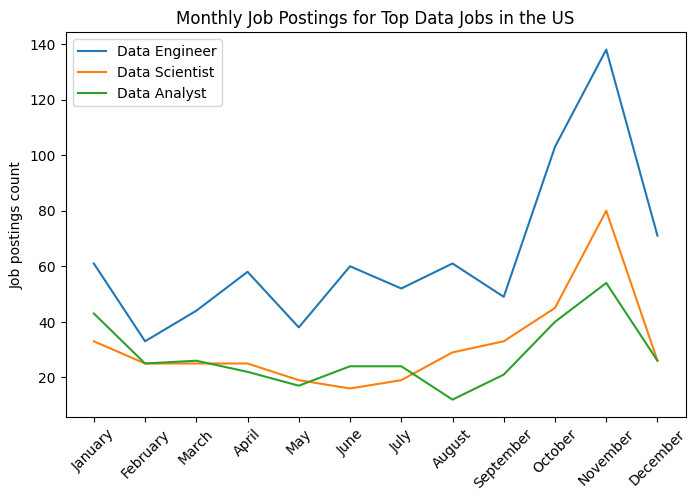

In [11]:
job_counts[top_jobs].plot(kind='line', xticks=range(12), figsize=(8,5))
plt.xticks(rotation=45, ha='center')
plt.xlabel('')
plt.ylabel('Job postings count')
plt.title('Monthly Job Postings for Top Data Jobs in the US')
plt.legend(title=False)